<img src="images/numpy.jpeg" style="float:right; width: 250px; "/>

## Python for Scientific Programming

# Introduction to NumPy

#### S. Caillou, EIT&AIC Master, 09-2019

# Plan

- Introduction
     - What is Numpy?
     - Why Numpy?
     - Differences between Numpy arrays and Python lists
     - Installation
- Numpy arrays
     - The ndarray object
     - Organization of arrays in memory
     - Different methods to build ndarray
     - Performances
- Data type
     - Basic data types
     - Structured data types
     - Conversion of strings to data-type
     - Convert a list to a data-type
     - Converting a dictionary to a data-type
- Access element and manipulation 
     - Access the elements of a ndarray: Indexing and Slicing
     - Array manipulation
     - Copy of arrays
     - Comparisons and masks
- Operations on arrays
     - Basic operations
     - Mathematical functions
- Manipulation of files
     - Text files
     - Binary files

<img src="images/numpy.jpeg" style="float:right; width: 200px; "/>
# Introduction

### What is Numpy?

Basic library for numerical computation and scientific programming in python

Manipulation of (large) multidimensional homogeneous arrays

High-level mathematical functions for numerical calculation, such as linear algebra (numpy.linalg), polynomial manipulation (numpy.polynomial), Fourier transform (numpy.fft), random sampling (numpy.random) ...

Competitor (free) at matlab

<img src="images/python_ecosystem_1.png" style="width: 500px; "/>

### Why NumPy?

- `NumPy` offers a more concise syntax than Python (list and tuple) containers for manipulating arrays.
- `NumPy` is thought for scientific computing.
- `NumPy` is optimized: it is partly implemented in the C language and in Fortran and therefore takes advantage of the speed of execution of these languages.
- `NumPy` uses continuous memory management, its arrays contain the data aligned in continuous memory areas, and the Python containers contain references to data stored in different places in the memory.

### Differences between Numpy tables and Python lists


** Major differences with Python lists ** (or list lists), which could also be used to represent vectors (or matrices):
- ** Tables `NumPy` are homogeneous **, that is to say made up of elements of the same type.
=> We will find tables of integers, floating tables, tables of strings, etc.
- The ** size of the `NumPy` arrays is set to the ** creation.
=> We can not increase or decrease the size of a table as we would for a list.

** Benefits for calculation **:
- The format of a table `NumPy` and the size of the objects which compose it being fixed, the footprint of the table in memory is invariable and access to its elements is done in constant time.
- The operations on the tables are optimized according to the type of elements, and are much faster than they would be on equivalent lists.

### Installation and Configuration

- Installation:

`` `Bash
foo @ bar: ~ $ pip install --user numpy
foo @ bar: ~ $ conda install numpy
`` `

- Import:

`` Python
import numpy as np
`` `

- Configuration: NumPy can rely on libraries of optimization of linear algebra like ATLAS, BLAS, LAPACK, OPENBLAS, MKL, ... which can boost the performances of a factor 10 to 100 according to the carried out operations and the machine architecture.

In [1]:
import numpy as np
print(np.__version__)

1.14.3


In [2]:
np.__path__

['/home/caillou/anaconda3/lib/python3.6/site-packages/numpy']

In [3]:
print(np.show_config()) # informations sur les librairies utilisées lors de la compilation de NumPy

mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/caillou/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/caillou/anaconda3/include']
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/caillou/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/caillou/anaconda3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/caillou/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/caillou/anaconda3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/caillou/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/caillou/anaconda3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/caillou/anaconda3/lib

# arrays in Numpy

## The ndarray object

Arrays are represented by objects of the `ndarray` class which is a Python type optimized for data representation.

Main attributes:

* **shape** : The format of the table is a tuple of N integers that gives information on the size of each dimension

* **dtype** : The type of array elements. A ndarray is an object composed of a collection of elements that must have exactly the same type of data. Thus, each element takes the same size in memory, and each block of memory of the array will be interpreted in the same way.

* **ndim** : The number of dimension of the array

* **strides** : The number of bytes to browse in memory to move to the next element according to each dimension

* **flags** : list of several flags giving information on the memory layout of the array (in particular whether the read order of elements in memory is contiguous of type C or of type Fortran )

In [4]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
print (a)

[[1. 2. 3.]
 [4. 5. 6.]]


In [5]:
print ("shape = ", a.shape)
print ("dtype = " , a.dtype)
print ("ndim = ", a.ndim)
print ("strides = " , a.strides)
print ("flags = ", a.flags)

shape =  (2, 3)
dtype =  float64
ndim =  2
strides =  (24, 8)
flags =    C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


## Organization of arrays in memory

- Assigning a variable name to a `ndarray` object => a ** reference ** to a `ndarray` object is created in the variable namespace

- The size of the `ndarray` is fixed at its creation from information on the dimensions of the table (* shape *), the type (* dtype *) of its elements (* data *) and the size of the step in memory ( * strides* ).

- ** The functions of `NumPy` are optimized for vectorized operations ** with objects of type `ndarray` and not for accesses element by element.

In [1]:
# Attention please install nbtutor first
# conda install -c conda-forge nbtutor to use nbtutor in notebook
%load_ext nbtutor

In [2]:
%%nbtutor -r -f
import numpy as np
l = [1, 2, 3]
a = np.array([1, 2, 3])

In [3]:
%%nbtutor -r -f --expand_arrays
import numpy as np
a = np.array([1, 2, 3])

The ndarray:

- has a continuous arrangement in memory

- is epresented in memory by a single 1-dimensional array

- can be saved in two ways in memory:
     - "C-style": reading line by line
     - "Fortran-style": read column by column

<img src = "./images/310_ndarray_memoire_C_fortran.png" style = "width: 600px" />

In [4]:
a = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [17]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [18]:
b = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9], [10, 11, 12]], order="F")
print(b)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [19]:
b.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [20]:
for i in np.nditer(a):
    print(i, end = ' ')

1 2 3 4 5 6 7 8 9 10 11 12 

In [21]:
for i in np.nditer(b):
    print(i, end = ' ')

1 4 7 10 2 5 8 11 3 6 9 12 

We can also see the influence of the write order in memory by using the _ ** reshape ** _ method and passing it the argument _ ** order ** _:

In [22]:
a = np.arange(1,13)
a_C = a.reshape(3,4, order='C')
a_F = a.reshape(3,4, order='F')
print(a_C)
print(a_F)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]


And we see that in order * type Fortran * the reading in memory is done well column by column:

In [23]:
for i in np.nditer(a_F):
    print(i, end = ' ')

1 2 3 4 5 6 7 8 9 10 11 12 

## Different methods to create ndarray

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.array-creation.html.

- ** `np.array(object, dtype=None, copy=True, order='K', subok = False, ndmin=0)` **: 

the [array](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.array.html) method generates a `ndarray` from the elements of the array-like object (usually a python list) passed as a parameter.

In [24]:
a = np.array([1, 2., 300])
print(a)

[  1.   2. 300.]


In [25]:
a = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [26]:
a.shape

(4, 3)

- ** `np.arange([start,] stop [, step,], dtype=None)` **: 

the [arange](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated /numpy.arange.html) method generates a `ndarray` whose element values are spaced by a given interval up to the excluded ** `stop` ** value. By default, the value of the first element (**`start` **) is 0 and the step (**`step` **) is 1. It is possible to have elements of type integer or floating.

In [59]:
np.arange(10, 1000, 50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

In [28]:
my_np_arange = np.arange(1, 13, 1.5)
print(my_np_arange)
print(type(my_np_arange))

[ 1.   2.5  4.   5.5  7.   8.5 10.  11.5]
<class 'numpy.ndarray'>


- ** `np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)` **: 

the [linspace](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linspace.html) method provides a 1-dimensional `ndarray` ranging from a start value (**` start` **) to an end value (** `stop` **) with a given number of elements (** `num` **). The end value can be excluded by setting the ** `endpoint` ** parameter to *` False` *.

In [29]:
np.linspace(2., 3., num=100)

array([2.        , 2.01010101, 2.02020202, 2.03030303, 2.04040404,
       2.05050505, 2.06060606, 2.07070707, 2.08080808, 2.09090909,
       2.1010101 , 2.11111111, 2.12121212, 2.13131313, 2.14141414,
       2.15151515, 2.16161616, 2.17171717, 2.18181818, 2.19191919,
       2.2020202 , 2.21212121, 2.22222222, 2.23232323, 2.24242424,
       2.25252525, 2.26262626, 2.27272727, 2.28282828, 2.29292929,
       2.3030303 , 2.31313131, 2.32323232, 2.33333333, 2.34343434,
       2.35353535, 2.36363636, 2.37373737, 2.38383838, 2.39393939,
       2.4040404 , 2.41414141, 2.42424242, 2.43434343, 2.44444444,
       2.45454545, 2.46464646, 2.47474747, 2.48484848, 2.49494949,
       2.50505051, 2.51515152, 2.52525253, 2.53535354, 2.54545455,
       2.55555556, 2.56565657, 2.57575758, 2.58585859, 2.5959596 ,
       2.60606061, 2.61616162, 2.62626263, 2.63636364, 2.64646465,
       2.65656566, 2.66666667, 2.67676768, 2.68686869, 2.6969697 ,
       2.70707071, 2.71717172, 2.72727273, 2.73737374, 2.74747

In [30]:
np.linspace(2., 3., num=5, endpoint=False)

array([2. , 2.2, 2.4, 2.6, 2.8])

- ** `np.reshape(a, newshape, order='C')` **: 

the [reshape](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.reshape.html) method generates a `ndarray` from the `ndarray` ** `a` data ** by changing its format with the **`newshape` ** parameter (an integer or a tuple of integers). By default, the order of the items (** `order` **) from ** to ** is in the order of type C.

In [31]:
np.reshape([0, 1, 2, 3, 4, 5], (2, 3))

array([[0, 1, 2],
       [3, 4, 5]])

In [32]:
a = np.arange(6)
a = a.reshape(2, 3)
print(a)

[[0 1 2]
 [3 4 5]]


- ** `np.flatten(order='C')` **: 

the [flatten](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.flatten.html) method applied to a `ndarray` returns a copy of it flattened on a dimension. You can change the order to flatten the `ndarray` (C style or Fortran style) with the **` order` ** parameter.

In [33]:
a = np.array([[1,2], [3,4]])
print(a.flatten()) # default is 'C'

[1 2 3 4]


In [34]:
print(a.flatten('F')) # <=> a.flatten(order='F')

[1 3 2 4]


- ** `np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype = None)` **: 

the [logspace](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.logspace.html) method provides a 1-dimensional `ndarray` similar to `np.linspace` but on a default decimal logarithmic scale (** `base` **). 

The sequence will begin at the value **<code>base<sup>start</sup></code>** and will end with the value ** <code>base<sup>stop</sup></code>** and will have ** `num` ** values.

For example to generate 10 uniformly spaced numbers on a logarithmic scale between ** <code>10<sup>1</sup> </code> ** and ** <code>10<sup>10</sup></code> ** (base = 10 by -1.14.0default):

In [35]:
np.logspace(1, 10, num=10)

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

Another example for generating 10 uniformly spaced numbers on a logarithmic scale between **<code>2<sup>1</sup></code>** and **<code>2<sup>10</sup></code>** (base=2):

In [36]:
np.logspace(1, 10, num=10, base=2)

array([   2.,    4.,    8.,   16.,   32.,   64.,  128.,  256.,  512.,
       1024.])

- ** `np.mgrid` **: 

The [mgrid](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mgrid.html) method generates a 3-dimensional ndarray containing 2 sub-tables that correspond to the abscissa and ordinate parameters passed in input. This makes it possible to create a grid of coordinates on which we can evaluate or interpolate a function for example.

For example, let's generate a grid where the Cartesian coordinates go from 0 to 2 excluded in steps of 0.5 on one axis and up to 2.5 excluded on the other axis:

In [37]:
np.mgrid[0:2:0.5, 0:2.5:0.5]

array([[[0. , 0. , 0. , 0. , 0. ],
        [0.5, 0.5, 0.5, 0.5, 0.5],
        [1. , 1. , 1. , 1. , 1. ],
        [1.5, 1.5, 1.5, 1.5, 1.5]],

       [[0. , 0.5, 1. , 1.5, 2. ],
        [0. , 0.5, 1. , 1.5, 2. ],
        [0. , 0.5, 1. , 1.5, 2. ],
        [0. , 0.5, 1. , 1.5, 2. ]]])

The [np.meshgrid](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.meshgrid.html) method is similar to `np.mgrid` but requires input from` ndarray` to 1 dimension already defined and corresponding to the requested abscissa and ordinate. 

For the example below, we use the `matplotlib` module to visualize the contours of the function $ 1 / (1 + r ^ 2) $ on a grid whose coordinates go from -1 to 1 in steps of 0.1.

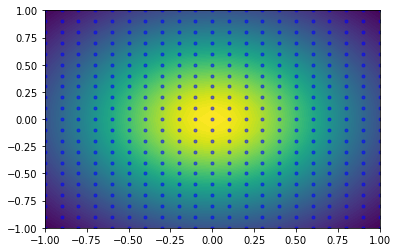

In [89]:
import matplotlib.pyplot as plt
x = np.arange(-1, 1.1, 0.1)
y = np.arange(-1, 1.1, 0.1)
xx, yy = np.meshgrid(x, y)
plt.plot(xx,yy, 'b.', alpha=0.5)
z = 1 / (xx**2 + yy**2+1)
h = plt.contourf(x,y,z, 100)
plt.show()

- ** `np.zeros(shape, dtype=float, order='C')` **: 

the [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) method generates a `ndarray` filled with 0 having a given form (**` shape` **) and type (** `dtype` **).

In [39]:
np.zeros((5,5), dtype=np.int)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

- ** `np.ones(shape, dtype=None, order='C')` **: 

the [ones](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ones.html) method generates a `ndarray` filled with 1 having a given form (**`shape` **) and type (** `dtype` **) (* np.float64 * by default).

In [40]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

- ** `np.eye(N, M=None, k=0, dtype=float)` **: 

the [eye](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.eye.html) method returns the form identity matrix (NxM), with ** `N` ** the number of rows and ** `M` ** the number of columns (equal to `N` by default)). So it's a 2-dimensional `ndarray` with 1 on the diagonal and 0 elsewhere. 

It is possible to modify the location of the diagonal with the parameter ** `k` ** (* k> 0 * positions the diagonal on the upper part of the matrix, * k <0 * on the lower part).

In [90]:
np.eye(10, dtype=int)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

- ** `np.diag(v, k = 0)` **: 

in case ** `v` ** is a vector, the [diag](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.diag.html) method generates a 2-dimensional `ndarray` with the values of this vector` v` placed on the ** `k` ** - th diagonal. 

If, on the other hand, ** `v` ** is of dimension 2, this method extracts the diagonal **` k` ** of this `ndarray`.

In [42]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [43]:
a = np.arange(16).reshape(4, 4)
print(a)
print("the ndarray diagonal is :", np.diag(a))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
La diagonale du ndarray a est : [ 0  5 10 15]


- ** `np.random` **: The [random](https://docs.scipy.org/doc/numpy/reference/routines.random.html) module of `NumPy` has several routines for generating ` ndarray` with random data.

The uniform random draw * in the interval [0,1] * can be done with the [** `np.random.rand(d0, d1, ..., dn)` **](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html) method, where ** `(d0, d1, ..., dn)` ** are the numbers of elements on the axes * 0, 1, ... n *.

There are several other methods (for example, [** `np.random.random(size=None)` **](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.random.html)), whose implementation differs slightly from `np.random.rand` but for which the output will be the same (floating point or `ndarray`).

In [44]:
np.random.rand()

0.002975222103157815

In [45]:
np.random.rand(2, 4)

array([[0.36938048, 0.24888437, 0.12269751, 0.008771  ],
       [0.48411056, 0.75522864, 0.16405971, 0.55954199]])

The random draw following a * standard normal law * (a Gaussian) is done with the [** `np.random.randn(d0, d1, ..., dn)` **](https: // docs. scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) method. It has an average of 0 and a variance of 1.

In [46]:
np.random.randn(2, 4)

array([[ 0.31689174,  1.55729031,  1.34273092,  0.49191783],
       [ 0.1139421 , -0.20633249,  1.23209472, -0.93891611]])

The random draw of an integer between a low value (__`low`__) included and a high value (__`high`__) excluded is done with the [**`np.random.randint(low, high=None, size=None, dtype='l')`**](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html) method.

By default, an integer between 0 and the input value is returned. It is possible to have a `ndarray` output by specifying its shape in the **`size` ** parameter.

In [47]:
np.random.randint(10) # <=> np.random.randint(low = 0, high = 10)

6

In [48]:
np.random.randint(0, 10, (2, 10)) # <=> np.random.randint(low = 0, high = 10, size = (1, 10))

array([[3, 4, 4, 9, 7, 4, 8, 7, 9, 3],
       [7, 9, 8, 4, 3, 5, 4, 4, 5, 5]])

In [49]:
np.random.seed(2)
np.random.randint(0, 10, (1, 10))

array([[8, 8, 6, 2, 8, 7, 2, 1, 5, 4]])

## Data types in Numpy

### Basic data types

The different ** basic types ** are based on those of the C language, here is a non-exhaustive list:
- np.bool
- np.int
- np.float
- np.complex
- np.str
- np.byte

More predefined types in `NumPy` are listed in the [documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/arrays.scalars.html#arrays-scalars-built-in)

In [50]:
a = np.arange(16)
print(a)
print(a.dtype)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
int64


### Specify data types

Parameter 'dtype' in array creation functions:

In [51]:
a = np.arange(16, dtype = np.float)
print(a)
print(a.dtype)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
float64


In [52]:
a = np.array([1, 2., 3])
print(a)
print(a.dtype)

[1. 2. 3.]
float64


In [53]:
a = np.array([1, 2., 3], dtype=np.int)
print(a)
print(a.dtype)

[1 2 3]
int64


### Dictionary of availabale data types

In [108]:
np.sctypes

{'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, bytes, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

### Structured Data: NumPy's Structured Arrays

One is free to choose a best suited type to one's needs from a combination of the elementary types of `NumPy`.

The `data-type` object is created with the class [**`np.dtype` **](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.dtype.html#numpy.dtype). 

It will allow `NumPy` to know the size in memory that `ndarray` will take.

#### Convert strings to `data-type` 

~~~ python
dt = np.dtype ('i4') # 32-bit signed integer
dt = np.dtype ('f8') # 64-bit floating-point number
dt = np.dtype ('c16') # 128-bit complex floating-point number
dt = np.dtype ('U25') # 25-character string
~~~

#### Convert a list to `data-type`

The format for using a list is: ** `[(field_name, field_dtype, field_shape), ...]` **.

~~~ python
dt_meteo = np.dtype ([('coordinates gps', np.float, (2,)), ('country', 'U15'), ('temperatures', np.float), ('sky', 'U20' ')])
~~~

In [109]:
dt_meteo = np.dtype([ ('coordinates gps', np.float, (2,)), ('country', 'U15'), ('temperatures', np.float), ('sky', 'U20') ])
print(dt_meteo)


[('coordinates gps', '<f8', (2,)), ('country', '<U15'), ('temperatures', '<f8'), ('sky', '<U20')]


We declare the object "* meteo *", a 1-dimensional `ndarray` with 2 elements of` data-type` "* dt_meteo *":

In [110]:
meteo = np.array( [
    ( (65, 18), 'Island', 0, 'cloudy' ),
    ( (28.5, 16.5), 'Canary', 27, 'sunny' )
]
    , dtype=dt_meteo)

In [57]:
print(meteo.dtype)

[('coordonnees gps', '<f8', (2,)), ('pays', '<U15'), ('temperatures', '<f8'), ('ciel', '<U20')]


One of the advantages of declaring a `data-type` with a list is to be able to ** call all the elements of the same field ** in a single command:

In [58]:
meteo['sky']

array(['nuageux', 'soleil'], dtype='<U20')

#### Convert a dictionary to `data-type`

- ** `{'names': ..., 'formats': ..., 'offsets': ..., 'titles': ..., 'itemsize': ...}` **

** required keys: (`names`,` formats`), optional keys (`offsets`,` titles`, `itemsize`) **

For each field of a new type, we indicate its name (** `names` **) and its format (**` formats` **). The formats can be any object accepted by the `np.dtype` (`int`,` np.float` ...) constructor.

~~~ python
dt = np.dtype ({
    'names': ['r', 'g', 'b'],
    'formats': ['i8', 'i8', 'i8'],
    'titles': ['red', 'green', 'blue']
})
~~~

In [112]:
dt = np.dtype({
    'names'   : ['r', 'g', 'b'],
    'formats' : ['i8', 'i8', 'i8'],
    'titles'  : ['red', 'green', 'blue']
})

In [113]:
pixels = np.array( [(255,255,255), (0,255,0)] , dtype=dt)
print(pixels)
print(pixels.dtype)
print (pixels.shape)

[(255, 255, 255) (  0, 255,   0)]
[(('red', 'r'), '<i8'), (('green', 'g'), '<i8'), (('blue', 'b'), '<i8')]
(2,)


## Elements access and arrays manipulation

### Indexing and Slicing

The basic slicing syntax: ** `M[start:stop:step, ...]` ** => returns a `ndarray`.

Access to the elements of the different dimensions is done either by using successive brackets (** `[..] [..]` **), or by using commas in the middle of square brackets (** `[. ., ..] `**).

The tables generated by the basic slicing are still views of the original table.

In [61]:
a = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [62]:
a[3, 2]  # <=> a[3][2]

12

In [63]:
a[0,:] 

array([1, 2, 3])

In [64]:
a[0]

array([1, 2, 3])

In [65]:
a[:,0]

array([ 1,  4,  7, 10])

In [66]:
a[:,-1]

array([ 3,  6,  9, 12])

In [67]:
a[:, 1] = 0
print(a)

[[ 1  0  3]
 [ 4  0  6]
 [ 7  0  9]
 [10  0 12]]


### Perfomance of slicing vs classic loops

In [115]:
a = np.reshape(np.arange(10**8), (10**4,10**4))
print(a)

[[       0        1        2 ...     9997     9998     9999]
 [   10000    10001    10002 ...    19997    19998    19999]
 [   20000    20001    20002 ...    29997    29998    29999]
 ...
 [99970000 99970001 99970002 ... 99979997 99979998 99979999]
 [99980000 99980001 99980002 ... 99989997 99989998 99989999]
 [99990000 99990001 99990002 ... 99999997 99999998 99999999]]


In [116]:
%%time
d = np.zeros(((99999, 10000)))
for i in range(1, len(a)):
    d[i-1] = a[i] - a[i-1]
print(d)

[[10000. 10000. 10000. ... 10000. 10000. 10000.]
 [10000. 10000. 10000. ... 10000. 10000. 10000.]
 [10000. 10000. 10000. ... 10000. 10000. 10000.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]
CPU times: user 155 ms, sys: 186 ms, total: 341 ms
Wall time: 340 ms


In [117]:
%%time
d = a[1:] - a[0:-1]
print(d)

[[10000 10000 10000 ... 10000 10000 10000]
 [10000 10000 10000 ... 10000 10000 10000]
 [10000 10000 10000 ... 10000 10000 10000]
 ...
 [10000 10000 10000 ... 10000 10000 10000]
 [10000 10000 10000 ... 10000 10000 10000]
 [10000 10000 10000 ... 10000 10000 10000]]
CPU times: user 93.5 ms, sys: 189 ms, total: 283 ms
Wall time: 281 ms


### Arrays manipulation

- ** `np.concatenate((a1, a2, ...), axis=0)` **: 

the [concatenate](https:/docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.concatenate.html)  method  concatenates a sequence of `ndarray` (**` (a1, a2, ...) `**) along an existing axis (**` axis` **).

In [73]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

In [74]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [75]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

- ** `np.stack(arrays, axis = 0)` **: 

The [stack](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.stack.html) method concatenates a sequence of `ndarray` (**` arrays` **) along a new axis (** `axis` **). All `ndarray` input must have the same shape (* shape *).

In [119]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.stack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

In [77]:
np.stack((a, b), axis=1)

array([[1, 4],
       [2, 5],
       [3, 6]])

- ** `np.split(a, indices_or_sections, axis=0)` **: 

The [split](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.split.html) method will cut the `ndarray` **`a` ** into several sub-ndarray.

If ** `indices_or_sections` ** is an integer * N *, then **`a`** will be cut into * N * equal sections along the axis ** `axis` **. 

If **`indices_or_sections`** is a 1-dimensional array, its entries will indicate the intervals on which to cut **`a`**.

In [78]:
x = np.arange(9.0)
np.split(x, 3)

[array([0., 1., 2.]), array([3., 4., 5.]), array([6., 7., 8.])]

In [79]:
np.split(x, [3, 5, 6])

[array([0., 1., 2.]), array([3., 4.]), array([5.]), array([6., 7., 8.])]

- ** `np.tile(a, reps)` **: 

the [tile](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.tile.html) method repeats the `ndarray `**` a` ** the number of times indicated by ** `reps` ** (integer or tuple).

In [126]:
np.tile(a, 5)

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

In [128]:
np.tile(a, (1,5))

array([[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]])

In [129]:
np.tile(a, (2,3))

array([[1, 2, 3, 1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3, 1, 2, 3]])

### Copy of arrays

For performance reasons, Python does not automatically copy objects but only references to these objects that we want to copy (when we do `b = a`). 

This is called a ** view **. 

Thus just like for an object of type * list *, modifying the copy of an object of type `ndarray` will affect the original data. 

To avoid this behavior, you can request ** deep copy ** using the [**`np.copy`**](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy .copy.html) method. 

In [131]:
a = np.arange(9).reshape((3,3))
print (a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [133]:
b = a    # no deep copy 
b[0] = 10000 # a has also been modified
print("Ndarray a :\n", a)
print("Ndarray b :\n", b)

Ndarray a :
 [[10000 10000 10000]
 [    3     4     5]
 [    6     7     8]]
Ndarray b :
 [[10000 10000 10000]
 [    3     4     5]
 [    6     7     8]]


In [134]:
c = np.copy(a)    # deep copy
c[0] = 0      # neither "a" nor "b" have been modified
print("Ndarray a :\n", a)
print("Ndarray b :\n", b)
print("Ndarray c :\n", c)

Ndarray a :
 [[10000 10000 10000]
 [    3     4     5]
 [    6     7     8]]
Ndarray b :
 [[10000 10000 10000]
 [    3     4     5]
 [    6     7     8]]
Ndarray c :
 [[0 0 0]
 [3 4 5]
 [6 7 8]]


In [86]:
a[0,0] = 10000000 # "b" will also be changed, but "c" will not be
print("Ndarray a :\n", a)
print("Ndarray b :\n", b)
print("Ndarray c :\n", c)

Ndarray a :
 [[300   1   1]
 [  3   4   5]
 [  6   7   8]]
Ndarray b :
 [[300   1   1]
 [  3   4   5]
 [  6   7   8]]
Ndarray c :
 [[100 100 100]
 [  3   4   5]
 [  6   7   8]]


## Comparisons and masks

- ** Masks = tables of Booleans or integers **, which can be obtained from tests or comparisons applied to `ndarray`, or simply from selected values.

- Very useful to modify only some data of a `ndarray`.

- Mask from ** Boolean values **.

The comparison between the values of two `ndarray` returns a` ndarray` whose elements are of type boolean:

In [87]:
a = np.array([1,2,3,4,5])
b = np.array([2,0,6,3,8])
masque = a<b
print(masque)

[ True False  True False  True]


In [88]:
a[masque]

array([1, 3, 5])

In [89]:
a[masque] = 100000.
print(a)

[100   2 100   4 100]


- ** `np.where(condition[, x, y])` **: 

the [where](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.where.html) method returns the elements of either `ndarray` **` x` ** or those of ** `y` ** according to the mask (**` condition` **). 

When the mask is * true * (boolean * True *), the values of `x` are returned, otherwise those of` y` will be.

In [90]:
x = [[1, 2], 
     [3, 4]]
y = [[9, 8], 
     [7, 6]]
booleen = [[True, False], 
           [True, True]]
np.where(booleen, x, y)

array([[1, 8],
       [3, 4]])

In [91]:
x = np.random.randn(2, 4)
print(x)
print (np.where(x > 0))

[[ 0.55145404  2.29220801  0.04153939 -1.11792545]
 [ 0.53905832 -0.5961597  -0.0191305   1.17500122]]
(array([0, 0, 0, 1, 1]), array([0, 1, 2, 0, 3]))


- ** `np.isin (element, test_elements, assumes_unique=False, invert=False)` **: 

the method [isin](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.isin.html) to test if the elements of `ndarray` **` element` ** are present in the list of elements ** `test_elements` **.

Warning ! This method is only implemented in `NumPy` since version 1.13.0.

In [159]:
element = 2*np.arange(9).reshape((3, 3))
print(element)

[[ 0  2  4]
 [ 6  8 10]
 [12 14 16]]


In [160]:
test_elements = [1, 2, 4, 8]
mask = np.isin(element, test_elements)
print(mask)
#array([[ False,  True],
#       [ True,  False]], dtype=bool)

[[False  True  True]
 [False  True False]
 [False False False]]


## Computation on NumPy Arrays

Numpy provide an easy and flexible interface to optimized computation with arrays of data.

Computation on NumPy arrays can be very fast, or it can be very slow.

The key to making it fast is to use *vectorized* operations, generally implemented through NumPy's *vectorized functions*.

### The Slowness of Loops

Python's default implementation (known as CPython) does some operations very slowly.

This is in part due to the dynamic, interpreted nature of the language: the fact that types are flexible, so that sequences of operations cannot be compiled down to efficient machine code as in languages like C and Fortran.

Recently there have been various attempts to address this weakness: 

well-known examples are the [PyPy](http://pypy.org/) project, a just-in-time compiled implementation of Python; 

the [Cython](http://cython.org) project, which converts Python code to compilable C code; 

and the [Numba](http://numba.pydata.org/) project, which converts snippets of Python code to fast LLVM bytecode.

Each of these has its strengths and weaknesses, but it is safe to say that none of the three approaches has yet surpassed the reach and popularity of the standard CPython engine.

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element.

For example, imagine we have an array of values and we'd like to compute the reciprocal of each.

A straightforward approach might look like this:

In [172]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

This implementation probably feels fairly natural to someone from, say, a C or Java background.

But if we measure the execution time of this code for a large input, we see that this operation is very slow.

In [173]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1.37 s ± 27.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. 

- This is known as a *vectorized* operation.

- This can be accomplished by simply performing an operation on the array, which will then be applied to each element.

- This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

Compare the results of the following two:

In [174]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


Looking at the execution time for our big array, we see that it completes orders of magnitude faster than the Python loop:

In [175]:
%timeit (1.0 / big_array)

1.2 ms ± 28.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Vectorized operations are not limited to one-dimensional arrays, they can also act on multi-dimensional arrays as well:

In [176]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

##### An other example : Raise elements squared

In [117]:
li = range(1000)
print(type(li))
nda = np.arange(1000)
print(type(nda))

<class 'range'>
<class 'numpy.ndarray'>


In [119]:
%timeit nda**2


772 ns ± 1.14 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [118]:
%timeit [i**2 for i in li]

175 µs ± 77.3 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Basic Operations

#### Addition

- Operator "+"
~~~ python
c = a + b
~~~
- ** `np.add (a, b, out=None, where=True, order='K', dtype=None)` **: 

the [add](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.add.html) method adds the one-to-one elements between two arrays **a** and **b**.

#### Multiplication

- Multiplication elements by elements:
~~~ python
c = a * b # Be careful not the real matrix product!
~~~

- True Matrix Product: 

** `np.matmul (a, b, out=None)` **: 

the [matmul](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.matmul.html)  method  (in `NumPy` since version 1.10.0) runs the array product between two arrays ** a ** and ** b **.

** `np.dot (a, b, out=None)` **: 

the [dot](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.dot.html) method runs the dot product between two tables ** a ** and ** b **. 

If these have more than 1 dimension, the matrix product will be used. 

However, the implementation differs from `np.matmul` and either method will be the most efficient depending on our working environment.

#### Transposed

- Operator .T
~~~ python
a_transpose = a.T
~~~
- Repositioning flags C_CONTIGUOUS and F_CONTIGUOUS
- Inversion of the value of the tuples shape and strides
- Attention transposed is a view of the original table

In [94]:
a = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [95]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [96]:
b = np.array([1, 2., 3])
b

array([1., 2., 3.])

In [97]:
a + b # Broadcasting

array([[ 2.,  4.,  6.],
       [ 5.,  7.,  9.],
       [ 8., 10., 12.]])

In [98]:
a = np.arange(9.0).reshape((3, 3))
b = np.arange(3.0)
np.add(a, b)

array([[ 0.,  2.,  4.],
       [ 3.,  5.,  7.],
       [ 6.,  8., 10.]])

In [99]:
a = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
print(a)
a * a # not the real matrix product!

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [100]:
np.dot(a,a)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [101]:
np.matmul(a,a)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [102]:
a = np.arange(1,13).reshape(3,4)
print(a.shape)
print(a)

(3, 4)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [103]:
print(a.T.shape)
print(a.T)

(4, 3)
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


In [104]:
a_C = a.reshape((3,4), order='C')
print(a_C)
print()
print(a_C.strides)
print(a_C.shape)
print()
print(a_C.flags)


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

(32, 8)
(3, 4)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [105]:
a_C_trans = a_C.T
print(a_C_trans)
print()
print(a_C_trans.strides)
print(a_C_trans.shape)
print()
print(a_C_trans.flags)

[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]

(8, 32)
(4, 3)

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


### Performance considerations

#### About transpose

Let's define a function "by hand" to compute the transpose of a two-dimensional `ndarray`:

In [107]:
def transpose_with_for_loop(my_array):
    my_array_transposed=np.zeros((my_array.shape[1],my_array.shape[0]),dtype=np.int)
    for i in range(my_array.shape[0]):
        for j in range(my_array.shape[1]):
            my_array_transposed[j,i]=my_array[i,j]
    return my_array_transposed

In [166]:
a = np.reshape(np.arange(10**6), (10**3,10**3))

In [108]:
%timeit transpose_with_for_loop(a)

169 ms ± 4.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [109]:
%timeit a.T

98.1 ns ± 2.68 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


The build time of the transpose is clearly shorter using the `NumPy` .T method.

In [167]:
a_T = a.T

In [111]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [112]:
a_T.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

#### About matrix product

Compare the computation times of the matrix products, according to the order in which the `ndarray` data is read, and using the two methods of `NumPy` to compute the matrix product.

In [163]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [171]:
%timeit np.matmul(a_T, a)

666 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [114]:
%timeit np.matmul(a, a_T)

596 ms ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [169]:
%timeit np.dot(a_T, a)

1.43 s ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [116]:
%timeit np.dot(a, a_T)

635 ms ± 3.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Array arithmetic

NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators.
The standard addition, subtraction, multiplication, and division can all be used:


In [ ]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

In [ ]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

### Absolute value

In [177]:
x = np.array([-2, -1, 0, 1, 2])
np.abs(x)

array([2, 1, 0, 1, 2])

### Trigonometric functions

NumPy provides a large number of useful functions, and some of the most useful for the data scientist are the trigonometric functions.

We'll start by defining an array of angles:

In [ ]:
theta = np.linspace(0, np.pi, 3)

In [ ]:
Now we can compute some trigonometric functions on these values:

In [ ]:
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

In [ ]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

### Exponents and logarithms

Another common type of operation available in a NumPy ufunc are the exponentials:

In [ ]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

The inverse of the exponentials, the logarithms, are also available.
The basic ``np.log`` gives the natural logarithm; if you prefer to compute the base-2 logarithm or the base-10 logarithm, these are available as well:

In [178]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


### Other mathematical functions

**`np.mean(a, axis=None, dtype=None, out=None)`**: 

the [mean](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.mean.html) method  is used to compute the arithmetic mean of the elements of `ndarray` ** a **.

If an axis is specified (** `axis` **), the average will be calculated only from the elements of it. For integer input, the default ** `dtype` ** result is `float64`; for input floats, the output data-type will be the same as input `ndarray` data.

If the result is returned as a table (for example when calculating an average along a certain axis), we can save it in the `ndarray` **`out` ** (which must be declared with the same format ( * shape *) than expected).

In [125]:
a = np.array([[1, 2], [3, 4]])
print(a)
np.mean(a)

[[1 2]
 [3 4]]


2.5

In [126]:
np.mean(a, axis=0)

array([2., 3.])

In [127]:
r = np.zeros(2)
a.mean(axis=1, out=r)

array([1.5, 3.5])

In [128]:
print(r)

[1.5 3.5]


* **`np.sum(a, axis=None, dtype=None, out=None)` ** and ** `np.prod(a, axis=None, dtype=None, out=None)`** operate in a similar way to the `np.mean` method.

The method [`sum`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.sum.html) is used to compute the sum of the elements of ` ndarray` **a** . 

The method [`prod`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.prod.html) is used to compute the product of items in `ndarray` **a**. 

Both can be calculated on a particular axis of `a` (**` axis` **).

In [129]:
np.sum(a)

10

In [130]:
np.prod(a)

24

* **`np.trace(a, offset=0, axis1=0, axis2=1, dtype=None, out=None)`**: 

the [trace](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.trace.html) method allows you to get the sum on the diagonal of `ndarray` **a**.

In [131]:
np.trace(a)

5

- ** `np.var` ** and **` np.std(a, axis=None, dtype=None, out=None, ddof=0) `**: 

the methods [var](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.var.html) and [std](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.std.html) allows compute respectively the variance and the standard deviation on the elements of `ndarray` ** a **.

The ** `ddof` ** (" * Delta Degrees of Freedom * ") parameter is an integer used for the calculation of the denominator `N-ddof` (`N` = the number of elements in `ndarray`).

The other parameters are the same as those used by `np.mean`.

In [132]:
np.var(a)

1.25

In [133]:
np.std(a)

1.118033988749895

- ** `np.min` ** and **` np.max(a, axis=None, out=None) `**:  

[min](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.amin.html) and [max](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.amax.html) methods return the minimum and maximum values respectively from `ndarray` ** a **.

The ** `axis` ** and **` out` ** parameters are the same as those used by `np.mean`.

In [134]:
print(np.min(a))
print(np.max(a))

1
4


The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

- ** `np.convolve (a, v, mode='full')` **: 

the [convolve](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.convolve. html)  method returns the discrete linear convolution product between 2 vectors (1 dimension) ** a ** (length `N`) and **` v` ** (length `M`).

In [135]:
a = np.array([1, 2, 300])
b = np.array([2, 1, 0.5])

In [136]:
np.convolve(a, b)

array([  2. ,   5. , 602.5, 301. , 150. ])

- ** `np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)` **: 

the [polyfit](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.polyfit.html) method returns the polynomial of degree ** `deg` ** of best approximation, in the least squares sense, of the points of `ndarray` ** `x` ** and ** `y` **:

`p(x) = p[0]*x**deg + ... + p[deg]`

In [137]:
x = [0,1,2,3,4]
y = [4,1,3,2,5]

In [138]:
# estimated coefficients for y = ax + b
np.polyfit(x, y, 1)

array([0.3, 2.4])

In [139]:
# estimated coefficients for y = ax² + bx + c
np.polyfit(x, y, 2)

array([ 0.64285714, -2.27142857,  3.68571429])

[ 0.98316376  0.12355201 -0.78738667 -6.35736578]


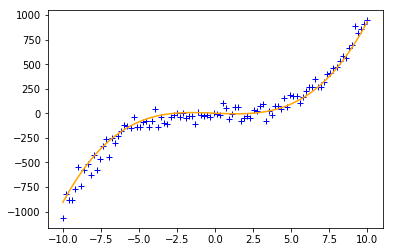

In [157]:
x = np.linspace(-10., 10., num=100)
y = x**3 - x + 1 + np.random.normal(0,60,100)

coeffs = np.polyfit(x, y, 3)
print(coeffs)
y_pred = coeffs[0]*x**3 + coeffs[1]*x**2 + coeffs[3]*x + 1

plt.plot(x, y, '+b')
plt.plot(x, y_pred, 'orange')
plt.show()

## Working with files

### Text files

The simple way of `NumPy` to back up and read data is to use the [**` np.savetxt` **](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/ numpy.savetxt.html) and [** `np.loadtxt` **](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.loadtxt.html) methods. 

Let's see how it works with the following simple ndarray:

In [140]:
my_data = np.arange(21).reshape(7,3)
#my_data[0,0]=10000
print(my_data)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]]


In [141]:
np.savetxt('data/data_numpy.txt', my_data)

We can check from the notebook that the ascii file has been created:

In [158]:
!ls -alrt data

ls: impossible d'accéder à 'data': Aucun fichier ou dossier de ce type


In [143]:
my_data_loaded = np.loadtxt('data/data_numpy.txt')

In [144]:
print(my_data_loaded)

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]
 [12. 13. 14.]
 [15. 16. 17.]
 [18. 19. 20.]]


As you can see, our initial data were **integer** but has been transformed into **float** data when saved with `np.savetxt`:

In [145]:
print(my_data.dtype)
print(my_data_loaded.dtype)

int64
float64


- ** `np.savetxt` **` (fname, X, fmt='%.18e', delimiter='', newline='\n', header='', footer='', comments ='#') `

The [**`np.savetxt`**](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.savetxt.html) method is used to save the data **` X` ** into a **`fname`** file.

We can choose the delimiter we want to have between the values(**`delimiter`**), for example to have `,` instead of spaces, as well as the symbol used to indicate a return to the line (** `newline` **). 

The **`header`** and **`footer`** parameters allow you to add a header and a footnote, whose lines will begin with a comment symbol chosen with the **`comments parameter`**.

The **`fmt`** parameter consists of a string starting with **`%`** that defines the format of the data that will be saved. This string is written as **`(%[flag] width [.precision] specifier)`**:

<img src = "images/310_savetxt-fmt.png" />

So for our example above, we want to have data saved with an integer type (* `d` *), with at least 1 digit:

In [146]:
np.savetxt('data/data_numpy2.txt', my_data, fmt='%.1d')

In [147]:
!cat data/data_numpy2.txt

0 1 2
3 4 5
6 7 8
9 10 11
12 13 14
15 16 17
18 19 20


For example, a title of each column can be aligned with the corresponding data:

In [148]:
np.savetxt('data/data_numpy3.txt', my_data, fmt='%3.1d', header="x   y   z")

In [149]:
!cat data/data_numpy3.txt

# x   y   z
  0   1   2
  3   4   5
  6   7   8
  9  10  11
 12  13  14
 15  16  17
 18  19  20


- **`np.loadtxt`**`(fname, dtype=float, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0) `

The [** `np.loadtxt` **](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.loadtxt.html) method reads the data in the file **fname**. 

This data defaults to `floating data-type` (**`dtype`**), but of course we can use more complex `data-types` as described in the previously.

It is possible to skip the first *n* lines (**`skiprows = n`**), but be careful the comment lines are taken into account. 

The **`usecols`** parameter allows you to select only certain columns for reading the file data. 

To read the columns separately and save them in variables, use the ** `unpack = True` ** argument. 

If the data stored in the file has less than 2 dimensions, we can ask that the `ndarray` returned be at least 0 (default), 1 or 2 dimension (**` ndmin` **).

The ** `converters` ** parameter is used to pass the values ​​of a column to a function.

In [150]:
data_numpy3 = np.loadtxt("data/data_numpy3.txt", dtype=np.int)
print(data_numpy3)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]]


Example with `unpack`:

In [151]:
x, y, z = np.loadtxt("data/data_numpy3.txt", dtype=np.int, unpack=True)

In [152]:
print(x)

[ 0  3  6  9 12 15 18]


Example with a more complex `data-type` and applying a function to the 3rd column:

In [153]:
dt={'names': ('x', 'y', 'z'),
    'formats': ('i4', 'i4', 'f4')}
data_numpy3_dt = np.loadtxt("data/data_numpy3.txt", converters={2: lambda s: s*2}, dtype=dt)
print(data_numpy3_dt['x'])
print(data_numpy3_dt.dtype)

[ 0  3  6  9 12 15 18]
[('x', '<i4'), ('y', '<i4'), ('z', '<f4')]


You will notice that this `ndarray` has only one dimension (following the use of a complex` data-type`), whereas the `ndarray` loaded by default (in the variable * data_numpy3 *) in a 2:

In [154]:
print(data_numpy3_dt.ndim)
print(data_numpy3.ndim)

1
2


But to have access to the first column of * data_numpy3_dt *, just call the name of it indicated in the `data-type`:

In [155]:
data_numpy3_dt['x']

array([ 0,  3,  6,  9, 12, 15, 18], dtype=int32)

## Binary files

To save and reload `ndarray` in binary format, we use [**`np.save`**](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.save.html) and [**`np.load`**](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.load.html) methods respectively .

In [156]:
np.save('data/data_numpy_exemple.npy', my_data)
!ls -alrt data

total 10196
-rw-rw-r-- 1 caillou caillou      105 juil.  1  2017 lsd.csv
-rw-rw-r-- 1 caillou caillou    61194 mars  16 00:32 titanic-train.csv
-rw-rw-r-- 1 caillou caillou    78894 mars  16 08:36 temp.csv
-rw-rw-r-- 1 caillou caillou     4522 mars  22 20:32 filename.pkl
-rw-rw-r-- 1 caillou caillou     3978 mars  26 14:23 model.pkl
-rw-rw-r-- 1 caillou caillou 10179996 mars  26 21:32 N36W113.hgt.zip
-rw-rw-r-- 1 caillou caillou    19600 avril 18 11:49 new-titanic-train.csv
-rw-rw-r-- 1 caillou caillou    50265 avril 18 11:49 new-titanic-train.xlsx
drwxrwxr-x 2 caillou caillou     4096 avril 18 12:02 .
drwxrwxr-x 8 caillou caillou     4096 mai    4 03:53 ..
-rw-rw-r-- 1 caillou caillou      525 mai    4 03:55 data_numpy.txt
-rw-rw-r-- 1 caillou caillou       53 mai    4 03:55 data_numpy2.txt
-rw-rw-r-- 1 caillou caillou       96 mai    4 03:55 data_numpy3.txt
-rw-rw-r-- 1 caillou caillou      296 mai    4 03:55 data_numpy_exemple.npy


In [157]:
my_data_loaded_from_npy = np.load('data/data_numpy_exemple.npy')

In [158]:
print(my_data_loaded_from_npy)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]]


In [159]:
print(my_data.dtype)
print(my_data_loaded_from_npy.dtype)

int64
int64


## Exercices

#### 1. Import numpy as np and print the version number.

In [18]:
import numpy as np
print (np.__version__)

1.14.3


#### 2. Create a 1D array of numbers from 0 to 9 (★☆☆)

In [ ]:
arr = np.arange(10)
arr

#### 3. Create a 3×3 numpy array of all True’s (★☆☆)

In [ ]:
np.full((3, 3), True, dtype=bool)
#> array([[ True,  True,  True],
#>        [ True,  True,  True],
#>        [ True,  True,  True]], dtype=bool)

# Alternate method:
np.ones((3,3), dtype=bool)

#### 4. Indexing and slicing : create an array of shape (6x6) and change the data so that their values correspond to the figure below (★☆☆)

<img src="images/310_exemple_ndarray_sclicing.png"/>

In [68]:
a = np.zeros((6,6))
a[0,:] = np.arange(6) # First row modification

for i in range(5) : 
    a[i+1,:] = a[i,:] + 10 #  

print(a)

[[ 0.  1.  2.  3.  4.  5.]
 [10. 11. 12. 13. 14. 15.]
 [20. 21. 22. 23. 24. 25.]
 [30. 31. 32. 33. 34. 35.]
 [40. 41. 42. 43. 44. 45.]
 [50. 51. 52. 53. 54. 55.]]


#### 5. Indexing and slicing :  write instructions to select and print the red, orange, green and blue squares on the figure above (★☆☆)

In [69]:
print (a[:, 2]) # red squares
print (a[0, 3:5]) # orange squares
print (a[2:5:2, ::2]) # green squares
print (a[-2:, -2:]) # blue squares

[ 2. 12. 22. 32. 42. 52.]
[3. 4.]
[[20. 22. 24.]
 [40. 42. 44.]]
[[44. 45.]
 [54. 55.]]


#### 6. How to extract items that satisfy a given condition from 1D array? Extract all odd numbers from arr

In [ ]:
# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Solution
arr[arr % 2 == 1]

#### 7. How to replace items that satisfy a condition with another value in numpy array? Replace all odd numbers in arr with -1

In [ ]:
# Input
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Solution
arr[arr % 2 == 1] = -1
arr

##### 8.How to replace items that satisfy a condition without affecting the original array? Replace all odd numbers in arr with -1 without changing arr

In [ ]:
# Input:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


# Solution
arr = np.arange(10)
out = np.where(arr % 2 == 1, -1, arr)
print(arr)
out

#### 9. How to reshape an array? Convert a 1D array to a 2D array with 2 rows

In [179]:
arr = np.arange(10)
arr.reshape(2, -1)  # Setting to -1 automatically decides the number of cols

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

#### 10. How to stack two arrays vertically?  Stack arrays a and b vertically

In [ ]:
#Input
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Answers
# Method 1:
np.concatenate([a, b], axis=0)

# Method 2:
np.vstack([a, b])

# Method 3:
np.r_[a, b]

#### 11. How to stack two arrays horizontally? Stack the arrays a and b horizontally. Get the positions where elements of a and b match

In [181]:
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# Answers
# Method 1:
np.concatenate([a, b], axis=1)

# Method 2:
np.hstack([a, b])

# Method 3:
np.c_[a, b]



array([[0, 1, 2, 3, 4, 1, 1, 1, 1, 1],
       [5, 6, 7, 8, 9, 1, 1, 1, 1, 1]])

#### 12. How to get the positions where elements of two arrays match?

In [180]:
# Input 
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])

# Solution
np.where(a == b)

(array([1, 3, 5, 7]),)

#### 13. How to extract all numbers between a given range from a numpy array? Get all items between 5 and 10 from a.

In [ ]:
#Input
a = np.arange(15)

# Method 1
index = np.where((a >= 5) & (a <= 10))
a[index]

# Method 2:
index = np.where(np.logical_and(a>=5, a<=10))
a[index]

# Method 3:
a[(a >= 5) & (a <= 10)]

#### 14. Convert the function maxx that works on two scalars, to work on two arrays. How to make a python function that handles scalars to work on numpy arrays?

In [ ]:
def maxx(x, y):
    """Get the maximum of two items"""
    if x >= y:
        return x
    else:
        return y

pair_max = np.vectorize(maxx, otypes=[float])

a = np.array([5, 7, 9, 8, 6, 4, 5])
b = np.array([6, 3, 4, 8, 9, 7, 1])

pair_max(a, b)

#### 15. How to reverse the columns of a 2D array?  Reverse the columns of a 2D array arr.

In [ ]:
# Input
arr = np.arange(9).reshape(3,3)

# Solution
arr[:, ::-1]

#### 16. How to create a 2D array containing random floats between 5 and 10? Create a 2D array of shape 5x3 to contain random decimal numbers between 5 and 10.

In [ ]:
# Input
arr = np.arange(9).reshape(3,3)

# Solution Method 1:
rand_arr = np.random.randint(low=5, high=10, size=(5,3)) + np.random.random((5,3))
# print(rand_arr)

# Solution Method 2:
rand_arr = np.random.uniform(5,10, size=(5,3))
print(rand_arr)

#### 17. How to compute the mean, median, standard deviation of a numpy array?

In [ ]:
# Input
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')
sepallength = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0])


# Solution
mu, med, sd = np.mean(sepallength), np.median(sepallength), np.std(sepallength)
print(mu, med, sd)

#### 18. How to normalize an array so the values range exactly between 0 and 1?

Create a normalized form of iris's sepallength whose values range exactly between 0 and 1 so that the minimum has value 0 and maximum has value 1.

In [ ]:
# Input
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
sepallength = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0])

# Solution
Smax, Smin = sepallength.max(), sepallength.min()
S = (sepallength - Smin)/(Smax - Smin)
# or 
S = (sepallength - Smin)/sepallength.ptp()  # Thanks, David Ojeda!
print(S)

#### 19. How to compute the softmax score? Compute the softmax score of sepallength.

In [ ]:
# Input
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='object')
sepallength = np.array([float(row[0]) for row in iris])

# Solution
def softmax(x):
    """Compute softmax values for each sets of scores in x.
    https://stackoverflow.com/questions/34968722/how-to-implement-the-softmax-function-in-python"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

print(softmax(sepallength))

#### 20. How to find the position of missing values in numpy array? Find the number and position of missing values in iris_2d's sepallength (1st column)

In [ ]:
# Input
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_2d = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])
iris_2d[np.random.randint(150, size=20), np.random.randint(4, size=20)] = np.nan

# Solution
print("Number of missing values: \n", np.isnan(iris_2d[:, 0]).sum())
print("Position of missing values: \n", np.where(np.isnan(iris_2d[:, 0])))

#### 21.  How to filter a numpy array based on two or more conditions? Filter the rows of iris_2d that has petallength (3rd column) > 1.5 and sepallength (1st column) < 5.0


In [182]:
# Input
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_2d = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])

# Solution
condition = (iris_2d[:, 2] > 1.5) & (iris_2d[:, 0] < 5.0)
iris_2d[condition]

array([[4.8, 3.4, 1.6, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [4.9, 2.5, 4.5, 1.7]])

#### 46. Create a structured array with `x` and `y` coordinates covering the \[0,1\]x\[0,1\] area (★★☆)

In [14]:
Z = np.zeros((5,5), [('x',float),('y',float)])
Z['x'], Z['y'] = np.meshgrid(np.linspace(0,1,5),
                             np.linspace(0,1,5))
print(Z)

[[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )]
 [(0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)]
 [(0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )]
 [(0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)]
 [(0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]]


#### 48. Print the minimum and maximum representable value for each numpy scalar type (★★☆)

In [ ]:
# %load solutions/x.py
for dtype in [np.int8, np.int32, np.int64]:
    print(np.iinfo(dtype).min)
    print(np.iinfo(dtype).max)
for dtype in [np.float32, np.float64]:
    print(np.finfo(dtype).min)
    print(np.finfo(dtype).max)
    print(np.finfo(dtype).eps)


#### 42. Consider two random array A and B, check if they are equal (★★☆)

In [55]:
A = np.random.randint(0,2,5)
print(A)
B = np.random.randint(0,2,5)
print(B)
# Assuming identical shape of the arrays and a tolerance for the comparison of values
equal = np.allclose(A,B)
print(equal)

# Checking both the shape and the element values, no tolerance (values have to be exactly equal)
equal = np.array_equal(A,B)
print(equal)

[1 1 1 1 1]
[1 1 1 1 1]
True
True


#### 43. Make an array immutable (read-only) (★★☆)

In [56]:
Z = np.zeros(10)
Z.flags.writeable = False
Z[0] = 1

ValueError: assignment destination is read-only

#### 44. Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates (★★☆)

In [ ]:
Z = np.random.random((10,2))
X,Y = Z[:,0], Z[:,1]
R = np.sqrt(X**2+Y**2)
T = np.arctan2(Y,X)
print(R)
print(T)

#### 45. Create random vector of size 10 and replace the maximum value by 0 (★★☆)

In [ ]:
Z = np.random.random(10)
Z[Z.argmax()] = 0
print(Z)

#### 52. Consider a random vector with shape (100,2) representing coordinates, find point by point distances (★★☆)

In [ ]:
Z = np.random.random((10,2))
X,Y = np.atleast_2d(Z[:,0], Z[:,1])
D = np.sqrt( (X-X.T)**2 + (Y-Y.T)**2)
print(D)

# Much faster with scipy
import scipy
# Thanks Gavin Heverly-Coulson (#issue 1)
import scipy.spatial

Z = np.random.random((10,2))
D = scipy.spatial.distance.cdist(Z,Z)
print(D)

#### 53. How to convert a float (32 bits) array into an integer (32 bits) in place?

In [ ]:
Z = np.arange(10, dtype=np.float32)
Z = Z.astype(np.int32, copy=False)
print(Z)

#### 55. What is the equivalent of enumerate for numpy arrays? (★★☆)

In [57]:
Z = np.arange(9).reshape(3,3)
for index, value in np.ndenumerate(Z):
    print(index, value)
for index in np.ndindex(Z.shape):
    print(index, Z[index])

(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8
(0, 0) 0
(0, 1) 1
(0, 2) 2
(1, 0) 3
(1, 1) 4
(1, 2) 5
(2, 0) 6
(2, 1) 7
(2, 2) 8


#### 56. Generate a generic 2D Gaussian-like array (★★☆)

In [ ]:
X, Y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
D = np.sqrt(X*X+Y*Y)
sigma, mu = 1.0, 0.0
G = np.exp(-( (D-mu)**2 / ( 2.0 * sigma**2 ) ) )
print(G)

#### 57. How to randomly place p elements in a 2D array? (★★☆)

In [ ]:
# Author: Divakar

n = 10
p = 3
Z = np.zeros((n,n))
np.put(Z, np.random.choice(range(n*n), p, replace=False),1)
print(Z)

#### 58. Subtract the mean of each row of a matrix (★★☆)

In [58]:
# Author: Warren Weckesser

X = np.random.rand(5, 10)

# Recent versions of numpy
Y = X - X.mean(axis=1, keepdims=True)

# Older versions of numpy
Y = X - X.mean(axis=1).reshape(-1, 1)

print(Y)

[[-0.3359229  -0.34861378  0.10288343 -0.29886516  0.58198898  0.56554371
  -0.39503764 -0.35938247 -0.09058768  0.57799349]
 [-0.37951068 -0.30430431 -0.05870961  0.39541265 -0.10541328  0.5335073
  -0.01272556  0.01093448  0.04056776 -0.11975874]
 [-0.49045443  0.4493176  -0.39130146 -0.25097756  0.38473455  0.10095239
  -0.16128723 -0.14768639  0.19463707  0.31206547]
 [-0.16029919  0.19875439 -0.20260806  0.06098443 -0.42314361  0.01643303
  -0.03479035  0.08547532  0.33347769  0.12571635]
 [ 0.23753027  0.20955571  0.10281287 -0.26604898  0.15520989 -0.35322473
  -0.08554086 -0.12268654  0.48521428 -0.36282192]]


### What's next ?

Scipy case of use on fft

Intro of scikit-learn